# Problem Set 4: Fixed Income

# Task 1: From Forwards to Interest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# a)

In [3]:
#Load Data
data_FTSE = pd.read_excel(r"PS4 - Data 1.xlsx")

#Define Fixed Values
facevalue = 100
spot = data_FTSE.iloc[0,1]
dvd = 0.0005

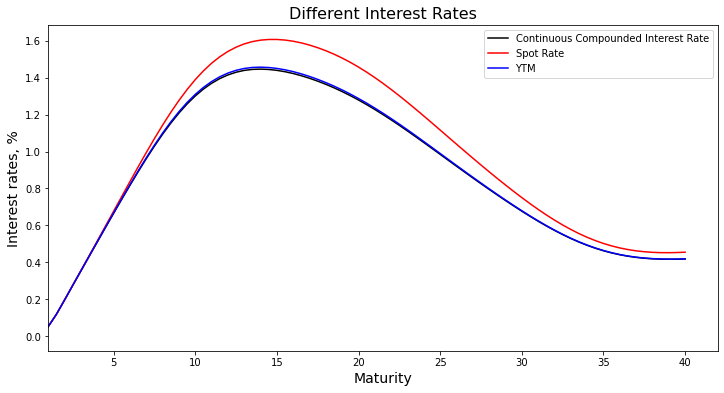

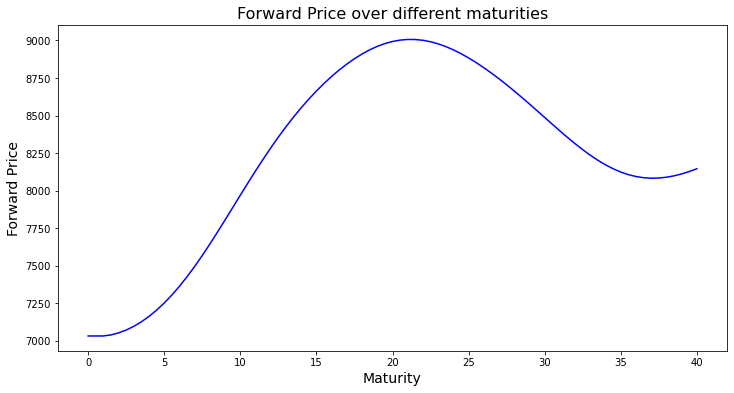

In [4]:
# (i) continuously compounded interest rate
# exp(-my)*F = S*exp(-mdelta) (15.7)
#y = ln(F/S)/m + delta

for column in data_FTSE:
    y = (np.log(data_FTSE['fwd price']/spot) / data_FTSE['maturity']) + dvd
data_FTSE['Cont Comp Int Rate'] = y

# (ii) Effective Interest rate (YTM)
# YTM = (((F/S)*exp(m*delta))**(1/m)) - 1

for column in data_FTSE:
    ytm = (((data_FTSE['fwd price']/spot)*np.exp(data_FTSE['maturity']*dvd))**(1/data_FTSE['maturity'])) - 1
data_FTSE['YTM'] = ytm

# (iii) Effective spot interest rate 
for column in data_FTSE:
    Y = (((data_FTSE['fwd price']/spot)*np.exp(data_FTSE['maturity']*dvd))-1)/data_FTSE['maturity']
data_FTSE['Spot Rate'] = Y

plt.figure(figsize = (12,6))
plt.plot(data_FTSE['maturity'], data_FTSE['Cont Comp Int Rate']*100, color ='black', label = 'Continuous Compounded Interest Rate')
plt.plot(data_FTSE['maturity'], data_FTSE['Spot Rate']*100, color = 'red', label = 'Spot Rate')
plt.plot(data_FTSE['maturity'], data_FTSE['YTM']*100, color = 'blue', label = 'YTM')
plt.xlim(xmin=1)
plt.legend(loc='best')

plt.title('Different Interest Rates', size = 16)
plt.xlabel('Maturity', size = 14)
plt.ylabel('Interest rates, %', size = 14)

plt.show()


plt.figure(figsize = (12,6))
plt.plot(data_FTSE['maturity'], data_FTSE['fwd price'], color = 'blue')
plt.title('Forward Price over different maturities', size = 16)
plt.xlabel('Maturity', size = 14)
plt.ylabel('Forward Price', size = 14)
plt.show()

# b)

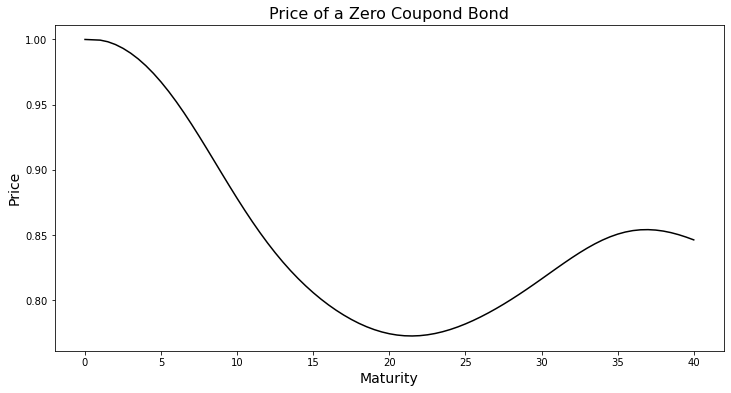

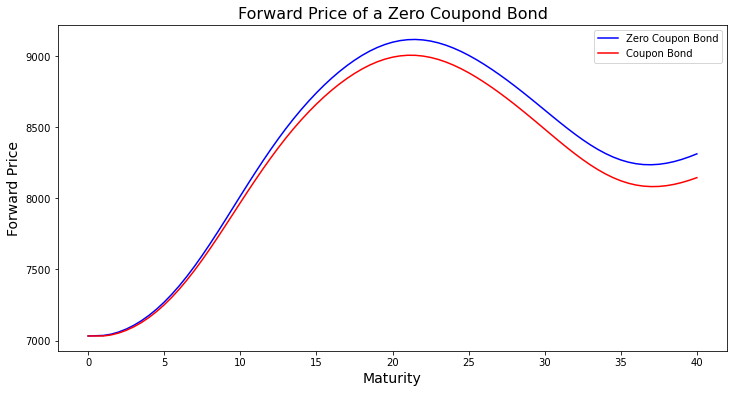

In [5]:
# Zeo Coupon Prices
# B(m) = (1+Y(m))**-m (16.2)
for column in data_FTSE:
    B = ((1+data_FTSE['YTM']))**-data_FTSE['maturity']
data_FTSE['Zero Coupon Bond Price'] = B

plt.figure(figsize = (12,6))
plt.plot(data_FTSE['maturity'], data_FTSE['Zero Coupon Bond Price'], color='black')
plt.title("Price of a Zero Coupon Bond", size = 16)
plt.xlabel('Maturity', size = 14)
plt.ylabel('Price', size = 14)
plt.show()

#and the Forward Price
#FWD_Zero = exp(my)S
FWD_Zero = (np.exp(data_FTSE['maturity']*data_FTSE['YTM']))*spot
data_FTSE['fwd price zero coupon'] = FWD_Zero

plt.figure(figsize = (12,6))
plt.plot(data_FTSE['maturity'], data_FTSE['fwd price zero coupon'], color='blue', label='Zero Coupon Bond')
plt.plot(data_FTSE['maturity'], data_FTSE['fwd price'], color='red', label='Coupon Bond')
plt.title("Forward Price of a Zero Coupon Bond", size = 16)
plt.xlabel('Maturity', size = 14)
plt.ylabel('Forward Price', size = 14)
plt.legend(loc='best')
plt.show()

# c)

In [6]:
#Forward Rate of a contract entering in 3y and selling in 20y
# FWR = (((1+Y(n))**(n((n-m)))) / ((1+Y(m))**(m/n-m))) - 1 (16.15)
#m=3, n=20
# FWR = ((1+Y(20)**(20/17))/(1+Y(17))**(3/17))-1

Y_20 = data_FTSE.iloc[39, 3]
Y_3 = data_FTSE.iloc[5, 3]
nominator = (1+Y_20)**(20/17)
denominator = (1+Y_3)**(3/17)

FWR = (nominator/denominator) - 1
print("The forward rate of a contract entering in 3 years and selling in 20 years is: " + str(round(FWR, 3)))

The forward rate of a contract entering in 3 years and selling in 20 years is: 0.015


# Task 2: Bond Price, Yield-to-Maturity and Duration

# a)

In [7]:
#Formula (16.17)
#Calculation of first part of Sum

c=1
m = 40
def odd_count(n):
    return list(range(1,n+1, 2))
v1_2a = odd_count(78) #Create vector with uneven numbers

price = []
for i in v1_2a:
    value = (c/((1+data_FTSE.iloc[i, 3])**data_FTSE.iloc[i, 0]))
    price.append(value)
   
sum1_2b = sum(price)

sum2_2b = 100/((1+data_FTSE.iloc[79, 3])**data_FTSE.iloc[79, 0])

bond_price = sum1_2b + sum2_2b
print("The price of the bond is: " + str(round(bond_price, 3)))

The price of the bond is: 117.697


# b)

In [17]:
#Approx YTM = 2((c+(1-P)(K)))/(1+P) (Remark 16.26)

YTM_2b = 2*(1+(100-bond_price)/m)/(100+bond_price)
print("The YTM is: " + str(round(YTM_2b, 5)) +", or 0.05%")


The YTM is: 0.00512, or 0.05%


# c)

In [12]:
price2c = []
face_value_2c = []
v1_2c = odd_count(80)
c=1

for i in v1_2c:
    value2c = data_FTSE.iloc[i, 0]*(c/((1+YTM_2b)**data_FTSE.iloc[i, 0]))
    price2c.append(value2c)
    FV = data_FTSE.iloc[i, 0]*(100/((1+YTM_2b)**(data_FTSE.iloc[i, 0])))
    face_value_2c.append(FV)

sum1_2c = sum(price2c) + face_value_2c[39]
Dollar_Dur = 1/(1+YTM_2b)*sum1_2c #Formula 17.1
Adj_Dur = Dollar_Dur / (bond_price) #Formula 17.6
Macaulay_Dur = Dollar_Dur*(1+YTM_2b) / (bond_price) #Formula 17.8

print("Results rounded to three digits:")
print("--------------------------------")
print("The Dollar Duration is: " + str(round(Dollar_Dur, 3)))
print("The Adjusted Duration is: " + str(round(Adj_Dur, 3)))
print("The Macaulay Duration is: " + str(round(Macaulay_Dur, 3)))

Results rounded to three digits:
--------------------------------
The Dollar Duration is: 3955.568
The Adjusted Duration is: 33.608
The Macaulay Duration is: 33.78
